# Data Exploration US Baby Names 1880-2010

Tutorial Reference: page 32-43 of **Python for Data Analysis Book by Wes McKinney**  
Dataset is sourced from [Pydata-book github](https://github.com/wesm/pydata-book)

The United States Social Security Administration (SSA) has made available data on the
frequency of baby names from 1880 through the present. Hadley Wickham, an author
of several popular R packages, has often made use of this data set in illustrating data
manipulation in R.

There are many things you might want to do with the data set:
- Visualize the proportion of babies given a particular name (your own, or another name) over time.
- Determine the relative rank of a name.
- Determine the most popular names in each year or the names with largest increases or decreases.
- Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
- Analyze external sources of trends: biblical names, celebrities, demographic changes

In [137]:
import pandas as pd

## Load names of babies born in 1880

In [138]:
names1880 = pd.read_csv('pydata-book/datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [139]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

## Load all baby names from year 1880 to 2010 into a multi-dimensional DataFrame

In [140]:
years = range(1880, 2011) #[1880 to 2010]

In [141]:
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'pydata-book/datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [142]:
names = pd.concat(pieces, ignore_index=True) #Concatenate everything into a single DataFrame

### There are a couple things to note here. 
(1), remember that concat glues the DataFrame objects together **row-wise** by default. 
(2), you have to pass **ignore_index=True** because we’re not interested in preserving the original row numbers returned from read_csv.

In [143]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [144]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [145]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


## Plot total births by sex and year

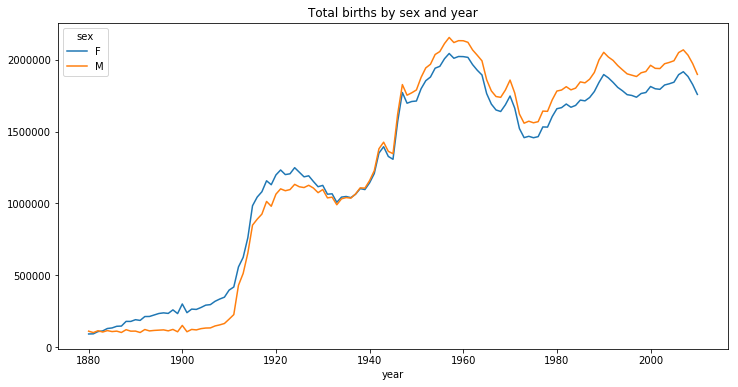

In [146]:
total_births.plot(title='Total births by sex and year', figsize=(12,6))

Next, let’s insert a column **prop** with the fraction of babies given each name relative to the total number of births. A **prop** value of **0.02** would indicate that 2 out of every 100 babies was given a particular name.  

Thus, we group the data by year and sex, then add the new column to each group:

In [147]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
# add_prop is a function that is applied to each row

```python
DataFrame.apply(func, axis=0, broadcast=None, raw=False, reduce=None, result_type=None, args=(), **kwds)
```

**[Important Arguments are:](https://thispointer.com/pandas-apply-apply-a-function-to-each-row-column-in-dataframe/)**

**func :** Function to be applied to each column or row. This function accepts a series and returns a series.  
**axis :** Axis along which the function is applied in dataframe. Default value 0.  
If value is 0 then it applies function to each column.  
If value is 1 then it applies function to each row.  
**args :** tuple / list of arguments to passed to function.  


In [148]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


When performing a group operation like this, it's often valuable to do a sanity check, like verifying that the prop column sums to 1 within all the groups. Since this is floating point data, use **np.allclose** to check that the group sums are sufficiently close to (but perhaps not exactly equal to) 1:

In [149]:
import numpy as np
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

# Analyzing Naming Trends
## Extract a subset of the data to facilitate further analysis: the top 1000 names for each sex/year combination.

## Method 1

In [150]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000[:10]

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188
         5   Margaret   F    1578  1880  0.017342
         6        Ida   F    1472  1880  0.016177
         7      Alice   F    1414  1880  0.015540
         8     Bertha   F    1320  1880  0.014507
         9      Sarah   F    1288  1880  0.014155

## Method 2

In [151]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index =True)

In [152]:
top1000[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [153]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [154]:
boys[:10]

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
947,Frank,M,3242,1880,0.029341
948,Joseph,M,2632,1880,0.023821
949,Thomas,M,2534,1880,0.022934
950,Henry,M,2444,1880,0.022119
951,Robert,M,2416,1880,0.021866


In [155]:
girls[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## Create a pivot table containing births of each name per year

In [156]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [157]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [158]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001710EF19F60>,
      dtype=object)

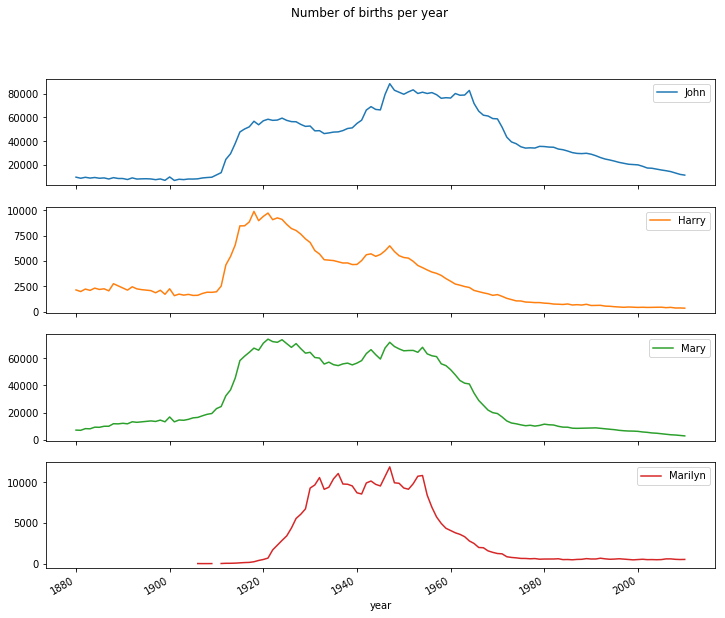

In [159]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title="Number of births per year")

The next 3 commands is to show the difference of the **Number of births per year** plot if you get the birth data of names John, Harry, Mary, and Marily from the original **names DataFrame** and not the subset of **top 1000**

In [160]:
total_births_temp = names.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [161]:
subset_temp = total_births_temp[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017104820CF8>,
      dtype=object)

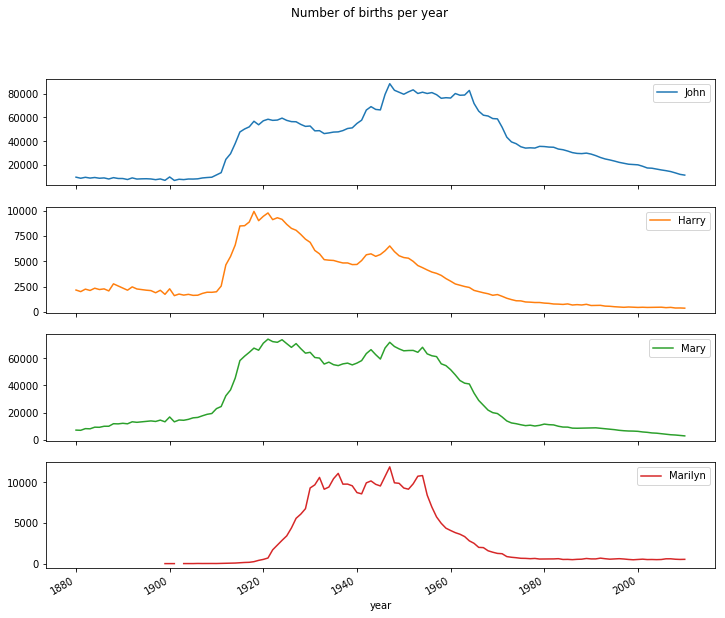

In [162]:
subset_temp.plot(subplots=True, figsize=(12,10), grid=False, title="Number of births per year")

### Measuring the increase in naming diversity

I. First Method: Metric # 1 show declining sum of prop by year and sex

In [163]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

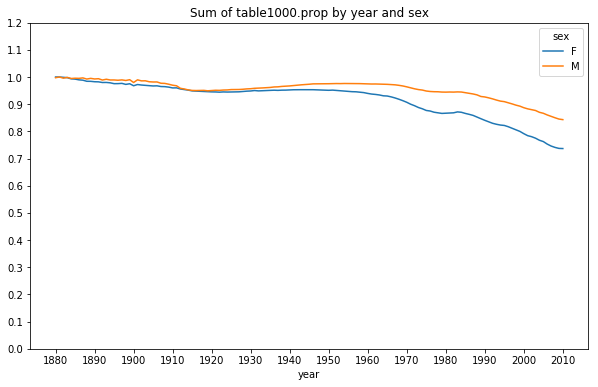

In [164]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10),  figsize=(10,6))

#### II. Metric # 2 
the increasing number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births

In [165]:
df = boys[boys.year == 2010]

In [166]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [167]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [168]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [169]:
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [170]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [171]:
in1900.searchsorted(0.5) + 1

array([25], dtype=int64)

In [172]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False).prop.cumsum()
    return int(group.searchsorted(q) + 1)


diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

diversity = diversity.unstack('sex')

In [173]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


In [174]:
type(diversity.loc[1880]['F'])

numpy.int64

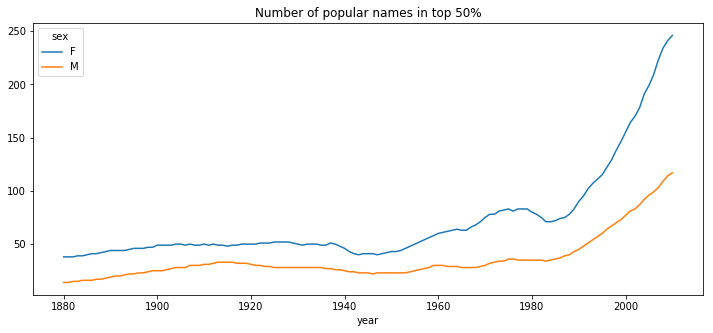

In [175]:
diversity.plot(figsize=(12,5), title="Number of popular names in top 50%")

## The Last Letter Revolution

In 2007, baby name researcher Laura Wattenberg pointed out on her website that the distribution of boy names by final letter has changed significantly over the last 100 years. To see this, we first aggregate all of the births in the full dataset by year, sex, and final letter:

In [176]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc = sum)

**Lambda function recall:**

lambda arguments : expression

```python
x = lambda a : a + 10
print(x(5))
```

### Then we select out three representative years spanning the history and print the first few rows: 

Get subtable with number of births of female and male in years 1910, 1960, and 2010 through reindex() func

In [177]:
subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')

In [178]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

### Normalize the table by total births to compute a new table containing proportion of total births for each sex ending in each letter:

In [179]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [180]:
letter_prop = subtable / subtable.sum().astype(float)

In [181]:
import matplotlib.pyplot as plt

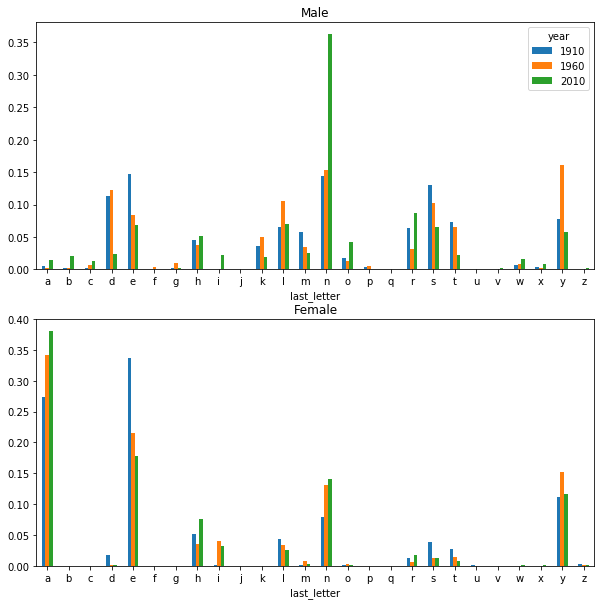

In [182]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend = False)

[From the book] As you can see, boy names ending in n have experienced significant growth since the 1960s. Going back to the full table created before, I again normalize by year and sex and select a subset of letters for the boy names, finally transposing to make each column a time series:

In [183]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


### Plot of the trends over time

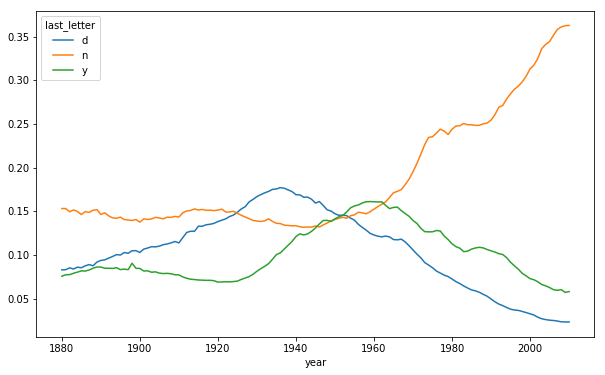

In [184]:
dny_ts.plot(figsize=(10,6))

### Boy names that became girl names (and vice versa)

In [185]:
all_names = top1000.name.unique()

In [232]:
all_names[:10]

array(['Mary', 'Anna', 'Emma', 'Elizabeth', 'Minnie', 'Margaret', 'Ida',
       'Alice', 'Bertha', 'Sarah'], dtype=object)

In [186]:
mask = np.array(['lesl' in x.lower() for x in all_names])

lesley_like = all_names[mask]

lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [187]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [188]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [189]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [190]:
table = table.div(table.sum(1), axis=0)

In [191]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


DataFrame.div()?>>??

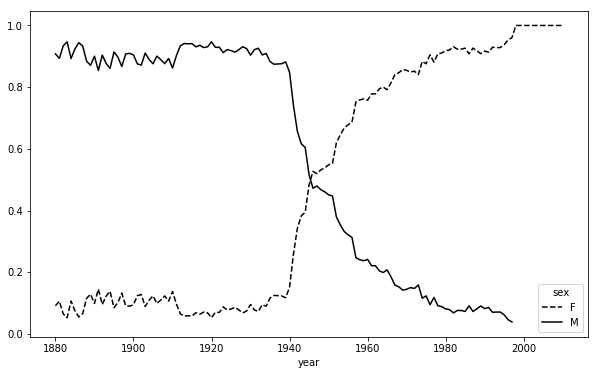

In [192]:
table.plot(style={'M': 'k-', 'F': 'k--'}, figsize=(10,6))

The name Lesley or Leslie became a popular name for females overtime.